# 2. Data Exploration

## Dataset Overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/global_air_quality_data_10000.csv')

In [3]:
# Print the shape of the dataset
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')
print("Sample data:")
display(df.head())

Dataset contains 10000 rows and 12 columns.
Sample data:


,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


## Check for Duplicates

In [4]:
# Duplicate check
duplicates = df.duplicated()
print(f'Number of duplicates: {duplicates.sum()}')

Number of duplicates: 0


## Column Information and Meanings

In [5]:
# Print data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB
None


Meanings of columns:
- `City`: Name of the city where the data was collected
- `Country`: Name of the country where the data was collected
- `Date`: Date when the data was collected
- `PM2.5` (µg/m³): Concentration of particulate matter less than 2.5 micrometers
- `PM10` (µg/m³): Concentration of particulate matter less than 10 micrometers
- `NO2` (µg/m³): Concentration of nitrogen dioxide
- `SO2` (µg/m³): Concentration of sulfur dioxide
- `CO` (mg/m³): Concentration of carbon monoxide
- `O3` (µg/m³): Concentration of ozone
- `Temperature` (°C): Temperature in degrees Celsius
- `Humidity` (%): Humidity percentage
- `Wind Speed` (m/s): Wind speed in meters per second

## Data Type Check

In [6]:
# Identify columns with potentially inappropriate data types
inappropriate_types = [col for col in df.columns if df[col].dtype == 'object' and df[col].apply(lambda x: str(x).isdigit()).any()]
if inappropriate_types:
    print(f'Columns with potential inappropriate data types: {inappropriate_types}')
else:
    print("No inappropriate data types found.")

No inappropriate data types found.


## Numerical Column Analysis

Distribution of numerical columns:

Column: PM2.5
Min: 5.02, Max: 149.98
Missing values: 0.00%


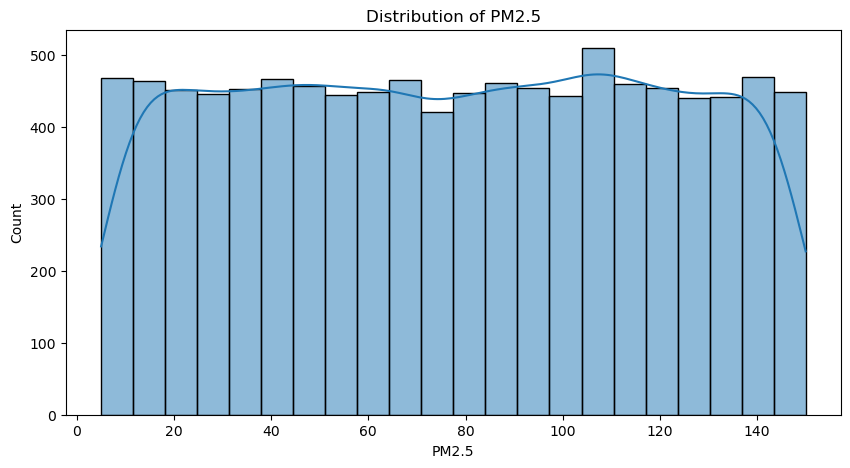


Column: PM10
Min: 10.0, Max: 200.0
Missing values: 0.00%


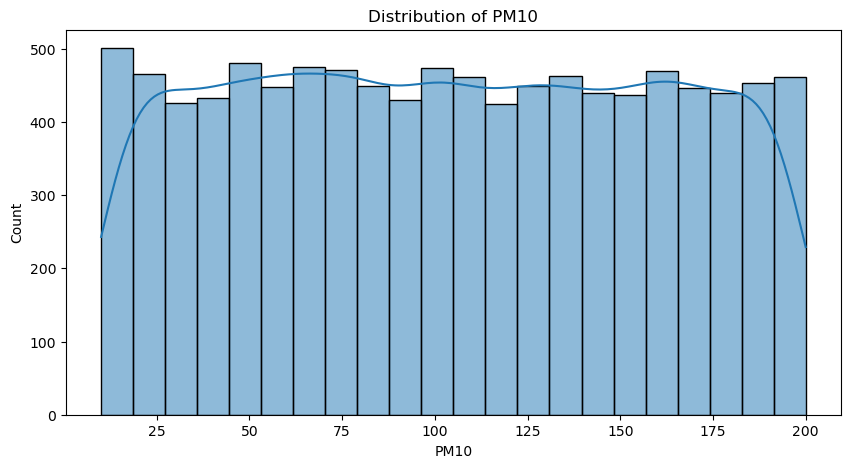


Column: NO2
Min: 5.01, Max: 100.0
Missing values: 0.00%


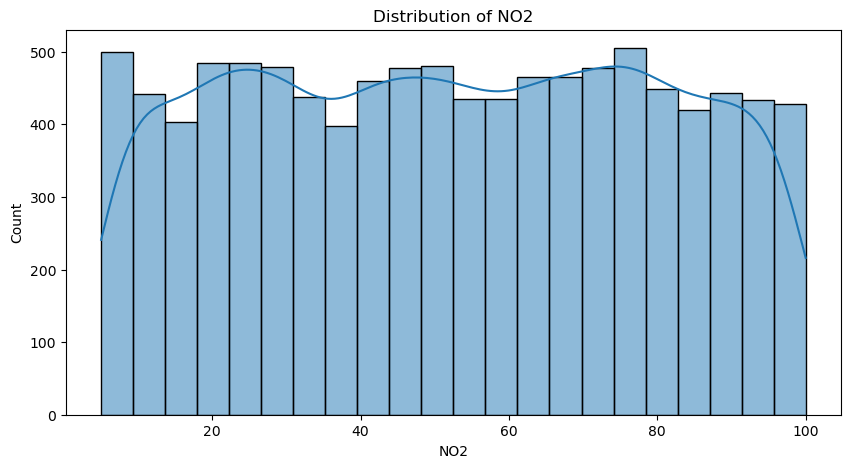


Column: SO2
Min: 1.0, Max: 49.99
Missing values: 0.00%


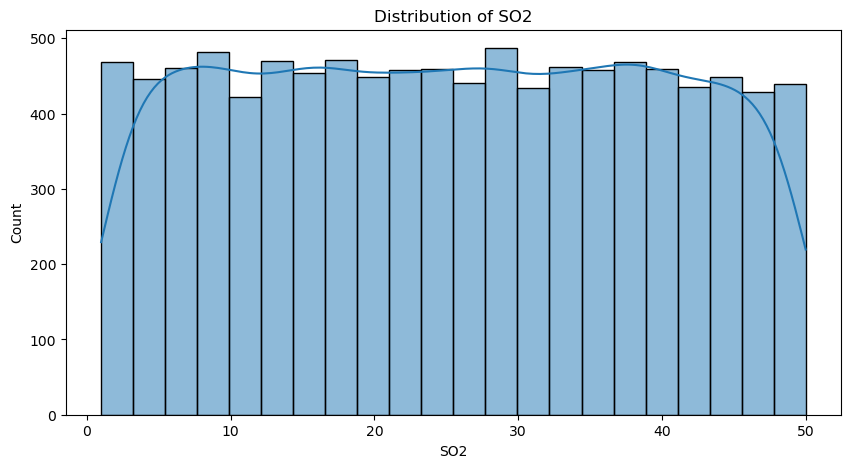


Column: CO
Min: 0.1, Max: 10.0
Missing values: 0.00%


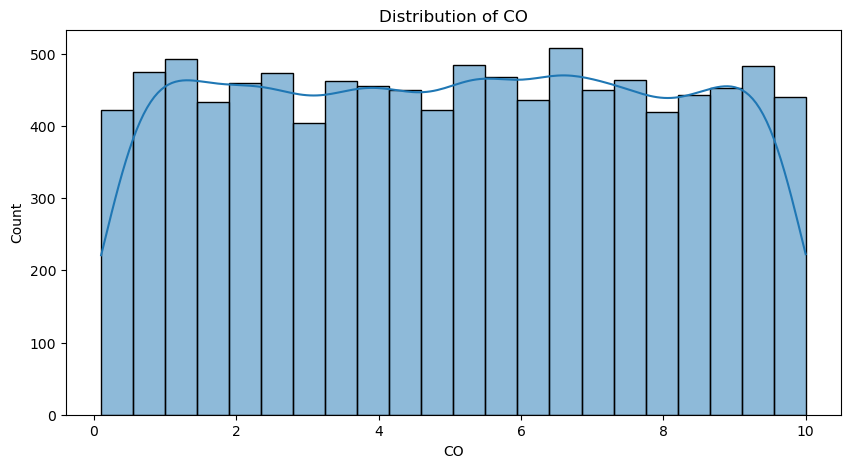


Column: O3
Min: 10.04, Max: 200.0
Missing values: 0.00%


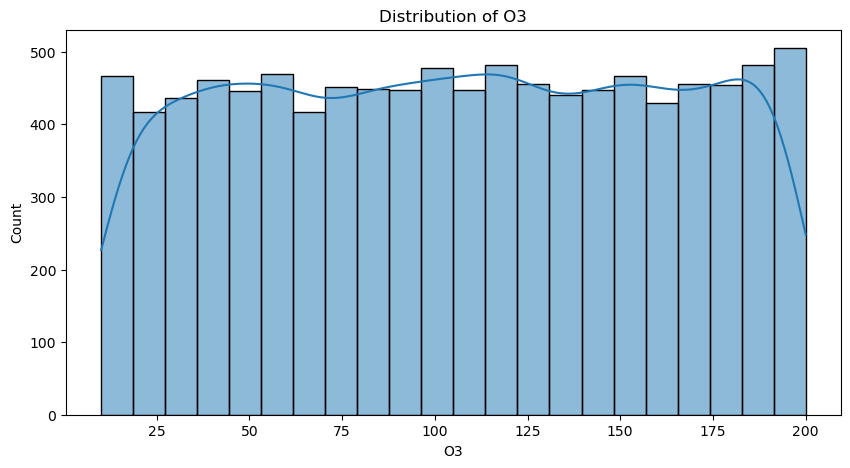


Column: Temperature
Min: -10.0, Max: 40.0
Missing values: 0.00%


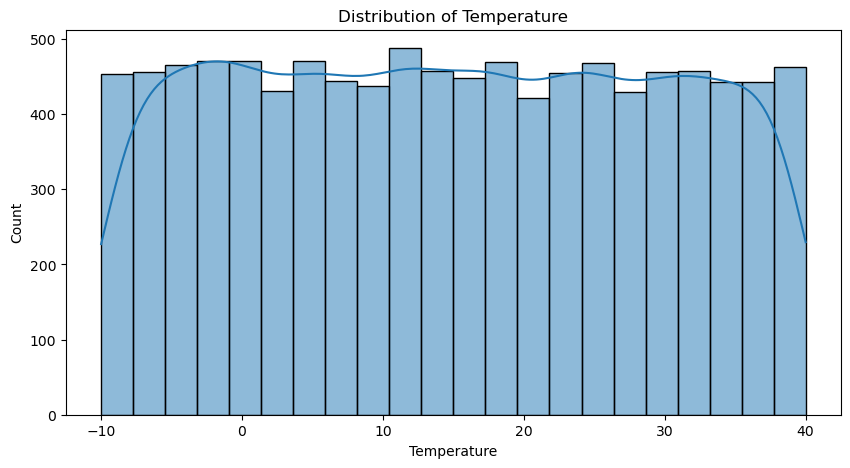


Column: Humidity
Min: 10.01, Max: 99.99
Missing values: 0.00%


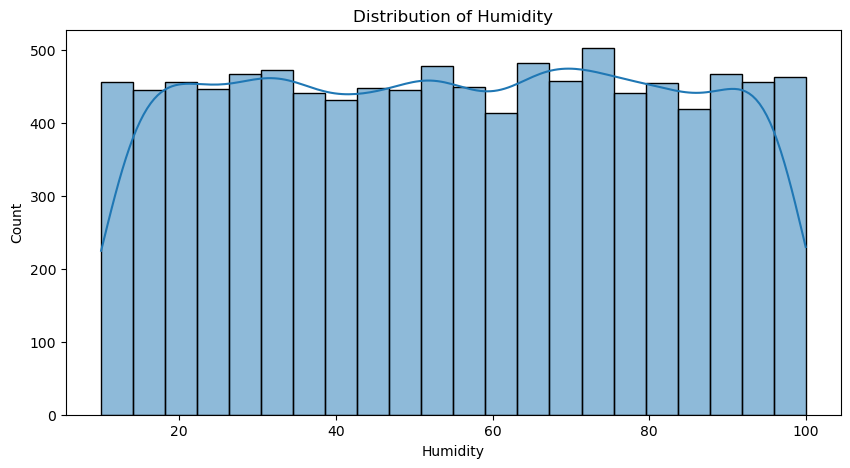


Column: Wind Speed
Min: 0.5, Max: 20.0
Missing values: 0.00%


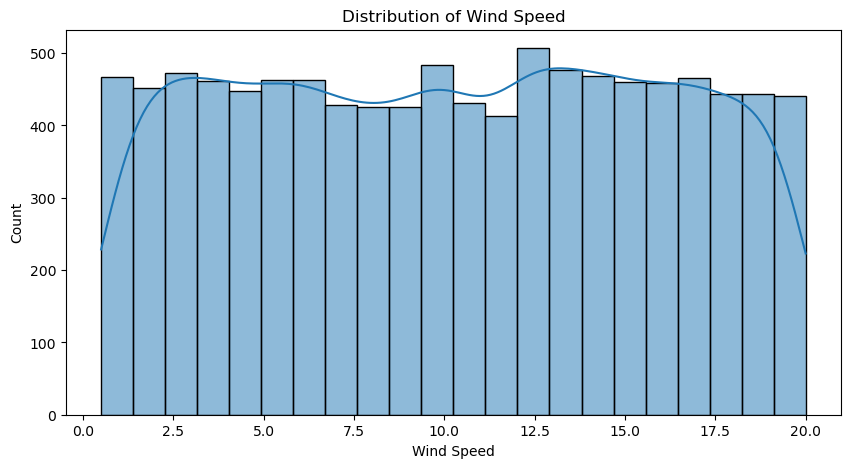

In [7]:
# Analyze distribution and check for missing values in numerical columns
print("Distribution of numerical columns:")
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    print(f'\nColumn: {col}')
    print(f'Min: {df[col].min()}, Max: {df[col].max()}')
    missing_percentage = df[col].isnull().mean() * 100
    print(f'Missing values: {missing_percentage:.2f}%')
    
    # Plot distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## Categorical Column Analysis


Distribution of categorical columns:

Column: City
Number of unique values: 20
Sample unique values: ['Bangkok' 'Istanbul' 'Rio de Janeiro' 'Mumbai' 'Paris']
Missing values: 0.00%


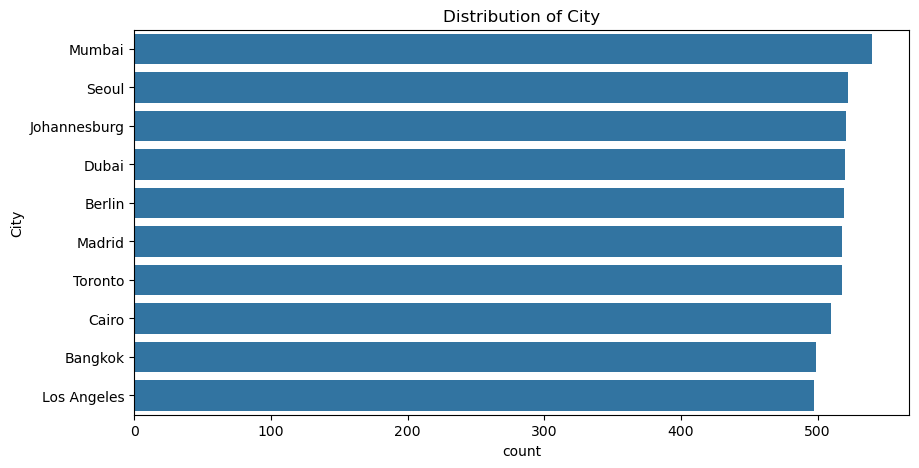


Column: Country
Number of unique values: 19
Sample unique values: ['Thailand' 'Turkey' 'Brazil' 'India' 'France']
Missing values: 0.00%


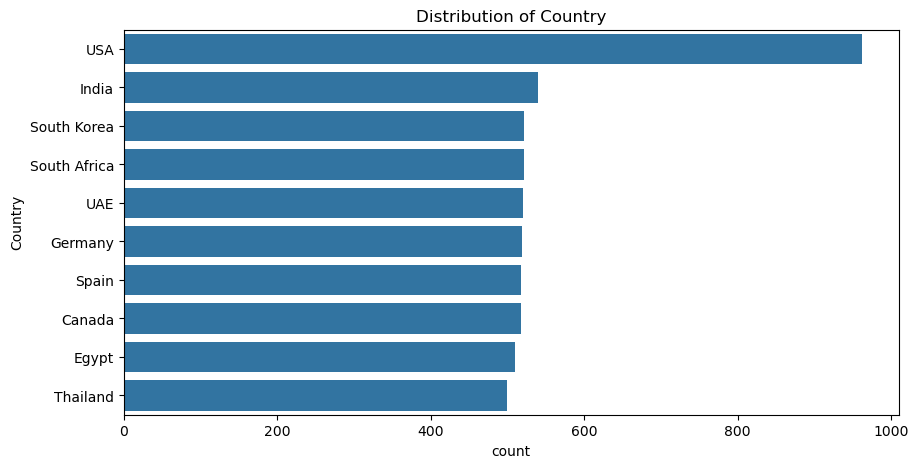


Column: Date
Number of unique values: 336
Sample unique values: ['2023-03-19' '2023-02-16' '2023-11-13' '2023-03-16' '2023-04-04']
Missing values: 0.00%


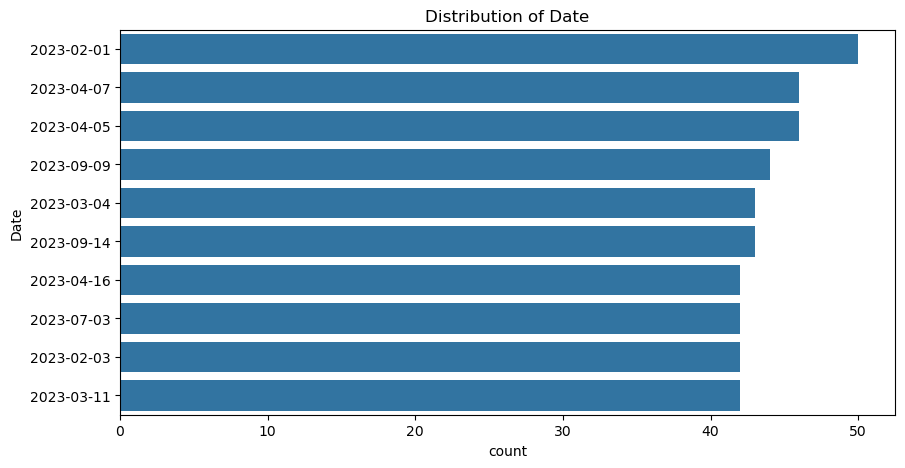

In [8]:
# Analyze distribution and check for missing values in categorical columns
print("\nDistribution of categorical columns:")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f'\nColumn: {col}')
    print(f'Number of unique values: {df[col].nunique()}')
    print(f'Sample unique values: {df[col].unique()[:5]}')
    missing_percentage = df[col].isnull().mean() * 100
    print(f'Missing values: {missing_percentage:.2f}%')
    
    # Plot distribution
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10])
    plt.title(f'Distribution of {col}')
    plt.show()